# From Data to Careers: A Subreddit Journey through r/datascience and r/jobs


---

## Part 2: Natural Language Processing

---

#### Introduction

Part 2 will delve into NLP techniques, transforming standard text data from titles and body of post into a format suitable for analysis. Using this approach, an enhanced understanding of the language used in the two subreddits will be gained, enabling a more accurate classification.

---

#### Deliverables

- Verify successful conversion of text data to a matrix representation.
- Preprocessing steps for textual data
- Explore word frequency analysis method, stemming, lemmatization and handle stop words
- Perform Topic Modeling



---

#### Imports

In [67]:
#pip install wordcloud

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# sklearn imports
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

#Natural Language Toolkit (NLTK) imports
#import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, RegexpTokenizer

#wordcloud import
from wordcloud import WordCloud

---

#### Text Data Transformation

**Load data**

In [69]:
#load the save csv files
df_datascience = pd.read_csv('../data/rdatascience.csv')
df_jobs = pd.read_csv('../data/rjobs.csv')

In [70]:
df_datascience.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,post_hint,preview,author_cakeday,url_overridden_by_dest,crosspost_parent_list,crosspost_parent,is_gallery,gallery_data,selftext_length,selftext_word_count
0,NaN,datascience,Hi I wanted to get some takes from actual statisticians/people in the field\n\nI'm a math graduate and I've done some self learning on statistics off and on the last two years. I've bounced back and forth considering grad school but the costs are very high (MS programs) both in person and online and I doubt I could swing it. Jobs want professional experience which I don't have. I'm very wary ...,t2_4ffvev5v,False,NaN,0,False,Interested in statistics not sure how to proceed,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,720,139
1,NaN,datascience,"I'm a statistician looking for work after a layoff in November and getting a lot of rejections.\n\nWould having a Github repository make my resume more competitive?\n\nIf so, which code should I include? I can't disclose past work examples without violating intellectual property agreements. \n\nOr do recruiters not look at applicant's Github repos?",t2_6cjiszgb,False,NaN,0,False,Create Github repository?,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,344,54
2,NaN,datascience,"My upcoming course is focused on programming a number of machine learning algorithms from scratch and requires a lot of demonstrated understanding of the related formulas and proofs. \n\nI have taken both linear algebra and multivariate calculus. Although I got good marks, I don't feel fluent in either topic. \n\nAs an example, I struggle to map summations to matrix equations and vice versa. I...",t2_3puwn,False,NaN,0,False,Linear Algebra and Multivariate Calculus,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,733,122
3,NaN,datascience,"Our company has 1000 ish headcount with 3 distinct business divisions, and has 2 DS teams, there are some chatters to merge the 2 teams into 1. I can see pros and cons to both merge and keep separate. Wondering how are other companies handling such situations? For smaller companies is it better to be centralized or decentralized??",t2_16kgog,False,NaN,0,False,"DS org, decentralized or centralized?",[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,332,58
4,NaN,datascience,"Hi all, I'd like to rehash my understanding of the fundamentals of probability theory. I'm trying to find a probability book that meets the following criteria:\n- Motivates different concepts and does not just show definition-proof-definition-proof\n- Is complete in that it covers all the fundamentals of probability\n- Is not overtly pro/anti bayesian\n- Suitable for a data science professiona...",t2_xfx8ms4,False,NaN,0,False,Probability reference book for data science professionals,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,773,124


In [71]:
df_jobs.head()

,subreddit,selftext,author_fullname,saved,gilded,clicked,title,link_flair_richtext,subreddit_name_prefixed,hidden,...,preview,url_overridden_by_dest,media_metadata,author_cakeday,is_gallery,gallery_data,crosspost_parent_list,crosspost_parent,selftext_length,selftext_word_count
0,jobs,Read that the best way to land a job nowadays is by networking. Well I have terrible social skills and bad anxiety. What can I do to fix this?,t2_3w2gl0jlt,False,0,False,How do people with Anxiety and terrible social skills network?,"[{'e': 'text', 't': 'Networking'}]",r/jobs,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,142,29
1,jobs,"""Mass layoffs are in store for 2024, and it might end up affecting nearly half of companies, according to a new poll.\n\nThat's the latest information from a Resume Builder survey, based on responses from more than 900 companies this month. Resume Builder is a professional platform that allows users to create resumes in just a few steps.\n\nIn the survey, nearly four in 10 companies said they ...",t2_105cy9,False,0,False,Massive layoffs coming in 2024?,"[{'e': 'text', 't': 'Article'}]",r/jobs,False,...,"{'images': [{'source': {'url': 'https://external-preview.redd.it/dp9opTKRxA7LyO79uY5x_blBtRMipdgRhqdNDRl95rk.jpg?auto=webp&amp;s=70f9b6556e57e61ef4b017efef6e854f3116d9e4', 'width': 3600, 'height': 2401}, 'resolutions': [{'url': 'https://external-preview.redd.it/dp9opTKRxA7LyO79uY5x_blBtRMipdgRhqdNDRl95rk.jpg?width=108&amp;crop=smart&amp;auto=webp&amp;s=3ac6701d1e6ac6fd1d8505cb5195ec4ba9b71122'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1011,148
2,jobs,"I enjoy solving problems &amp; dealing with complex situations. I love research, I like data and I have a chemistry background. However, I also love innovation and using creativity. I enjoy aesthetics &amp; expression!!! \n\nI’ve been looking in food product development, formulation chemistry for health, wellness &amp; personal care industry and web &amp; digital interface design. \n\nAre ther...",t2_oqajavlw,False,0,False,What are some scientific jobs that are innovative &amp; creative?,"[{'e': 'text', 't': 'Job searching'}]",r/jobs,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,501,79
3,jobs,Process at my company is quite easy and my manager is good. She walked my through every question/points and help me think of what to improve next year\n\nThough we both know with a micro-managing boss (her direct manager) those are hard to achieve,t2_pbff0s9v,False,0,False,How's your annual performance review?,"[{'e': 'text', 't': 'Evaluations'}]",r/jobs,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,246,44
4,jobs,"Interviewed with a company and was offered the job and am to be given a start date once the background check is completed.\n\nIn 2022 I had a full time job which moved to part time once I took another position, and I worked at that part time job probably less than 100 hours over all of 2023.\n\nOn my resume I just put the end date for that job as when I stopped being full time and don't bother...",t2_6m4lv,False,0,False,Part time job on resume?,"[{'e': 'text', 't': 'Post-interview'}]",r/jobs,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,870,173


---

**Verification of successful conversion**

In [72]:
def verify_cvec_conversion(data, text_column='selftext'):
    """
    Verify the succesful conversion of the text data in the original 
    dataframe to a count matrix using Count Vectorizer
    
    Parameters:
    - data(Dataframe): The input dataframe containing the column selftext with
    the text data
    - text_column (str): The name of the column containing text data.
    Default is 'selftext'
    
    Returns:
    - tuple: A tuple showing the shape of the resulting count vectorizer matrix
    """
    text_data = data[text_column].astype(str)
    
    #initialize counter vectorizer with english stop words
    cvec = CountVectorizer(stop_words='english')
    
    #fit and transform the text data to count matrix on the Reddit selftext
    cvec_matrix = cvec.fit_transform(text_data)
    
    # Check the shape of the resulting Count matrix
    print(f"\nShape of Count Matrix: {cvec_matrix.shape}")
    
    return cvec_matrix.shape

def verify_tvec_conversion(data, text_column='selftext'):
    """
    Verify the succesful conversion of the text data in the original 
    dataframe to a TF-IDF matrix using TfidfVectorizer.
    
    Parameters:
    - data(pd.Dataframe): The input dataframe containing the column selftext with
    the text data
    - text_column (str): The name of the column containing text data.
    Default is 'selftext'
    
    Returns:
    - tuple: A tuple showing the shape of the resulting TF-IDF matrix
    
    Example:
    verify_cvec_conversion(df_datascience)
    """
    text_data = data[text_column].astype(str)
    
    #initialize TF-IDF vectorizer
    tvec = TfidfVectorizer(stop_words='english')
    
    #fit and transform the text data to TF-IDF matrix on the Reddit selftext
    tvec_matrix = tvec.fit_transform(text_data)
    
    # Check the shape of the resulting TF-IDF matrix
    print(f"\nShape of TF-IDF Matrix: {tvec_matrix.shape}")
    
    return tvec_matrix.shape
    

In [73]:
#verify CountVectorizer conversion
verify_cvec_conversion(df_datascience)
verify_cvec_conversion(df_jobs)


Shape of Count Matrix: (710, 7955)

Shape of Count Matrix: (927, 7585)


(927, 7585)

In [74]:
#verify TfidfVectorizer conversion
verify_tvec_conversion(df_datascience)
verify_tvec_conversion(df_jobs)


Shape of TF-IDF Matrix: (710, 7955)

Shape of TF-IDF Matrix: (927, 7585)


(927, 7585)

---

**Explore Text Preprocessing Techniques:**

The common pre-processing steps for text data includes, removing special characters, tokenizing, lemmatizing/stemming and stop word removal. Initializing countvectorizer and TfidVectorizer actually do a lot of this for us! The function explore_text_preprocessing below returns a set of two subplots visualizing the effects of text preprocessing on word frequencies that shows the top 16 most common words in both r/datascience and r/jobs subreddit. The function remove_specfic_text reove specific words and handle contractions from the the dataframe 


In [75]:
def explore_text_preprocessing(data, column_name='selftext', save_path=None):   
    """
    Explore the effects of text preprocessing 
    on the given text data for the chosen dstafame using CountVectorizer 
    and TfidfVectorizer. This function visualizes the top 16 
    most common words for both CountVectorizer and TfidfVectorizer.
    It applies text preprocessing techniques like 
    stop words and special character removal.
    
    Parameters:
    - data (pd.dataframe): The input dataframe containing 
    the column selftext with the text data
    - column_name (str): The name of the column containing text data.
    Default is 'selftext'.
    
    Returns:
    None (displays plots)
    
    Example:
    explore_text_preprocessing(df_jobs, column_name='selftext')  
    """
    text_data = data[column_name].astype(str)
    
    #initialize count vectorizer and TfidfVectorizer 
    #with english stop words 
    cvec = CountVectorizer(stop_words='english')
    tvec = TfidfVectorizer(stop_words='english')
    
    #fit and transform the text data to TF-IDF and 
    # count matrix on the Reddit selftext
    cvec_matrix = cvec.fit_transform(text_data)
    tvec_matrix = tvec.fit_transform(text_data)
    
    #visualize the effects of text preprocessing
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot the 16 most common words for CountVectorizer
    top_words_cvec = cvec_matrix.sum(axis=0).A1
    top_indices_cvec = np.argsort(top_words_cvec)[::-1][:16]
    axes[0].set_title('Top 16 Most Common Words (Count)')
    axes[0].bar(range(16), top_words_cvec[top_indices_cvec], color='skyblue')
    axes[0].set_xticks(range(16))
    axes[0].set_xticklabels([cvec.get_feature_names_out()[i] for i in top_indices_cvec], rotation=45, ha='right')
    axes[0].set_xlabel('Word')
    axes[0].set_ylabel('Frequency')
    
    
    # Plot the 16 most common words for TfidfVectorizer
    top_words_tvec = tvec_matrix.sum(axis=0).A1
    top_indices_tvec = np.argsort(top_words_tvec)[::-1][:16]
    axes[1].set_title('Top 16 Most Common Words (TF-IDF)')
    axes[1].bar(range(16), top_words_tvec[top_indices_tvec], color='lightcoral')
    axes[1].set_xticks(range(16))
    axes[1].set_xticklabels([tvec.get_feature_names_out()[i] for i in top_indices_tvec], rotation=45, ha='right')
    axes[1].set_xlabel('Word')
    axes[1].set_ylabel('Frequency')
    
    plt.tight_layout()
    #save the image if save path provided
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
        
    plt.show()

    

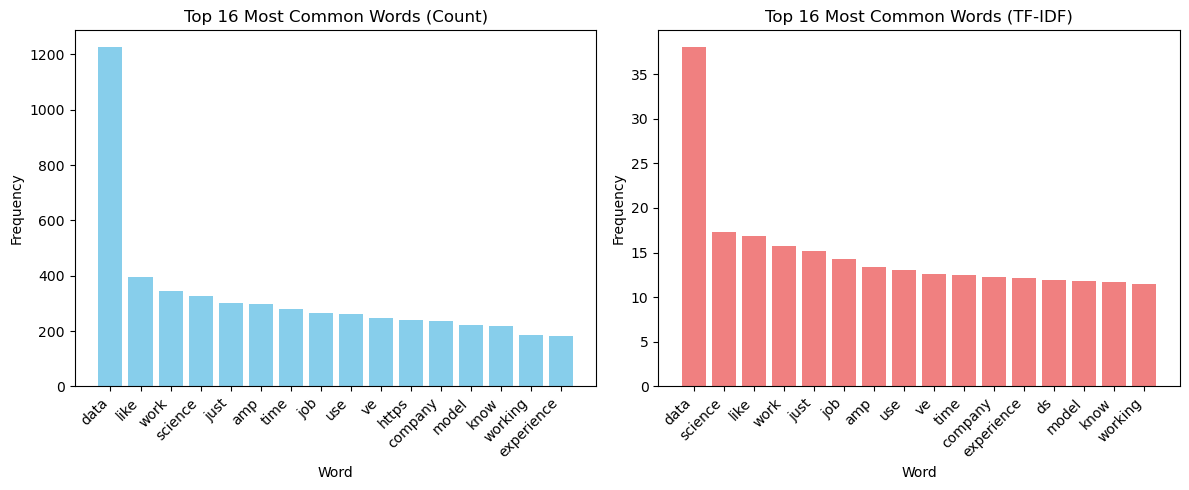

In [76]:
explore_text_preprocessing(df_datascience, column_name='selftext')

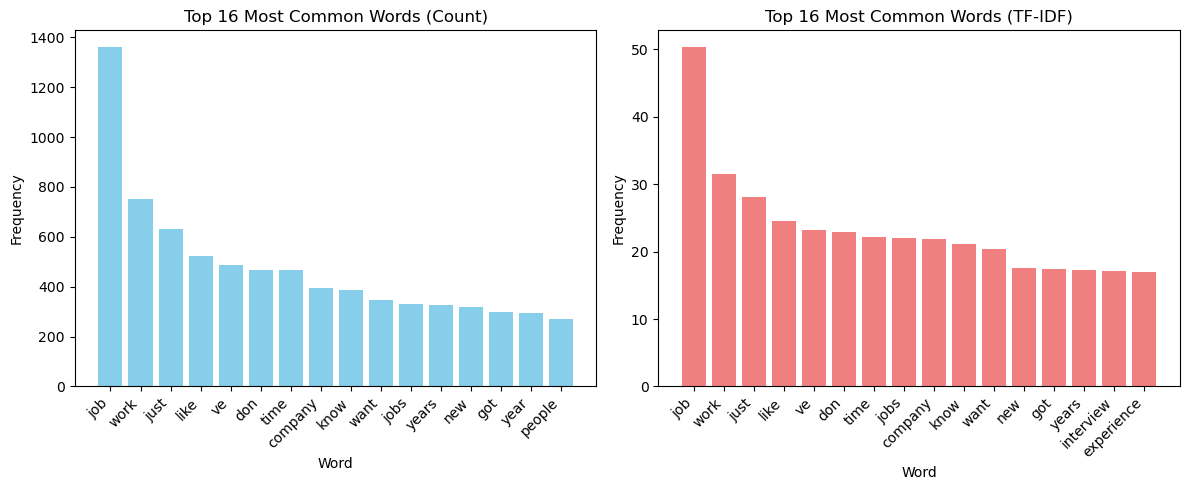

In [77]:
explore_text_preprocessing(df_jobs, column_name='selftext', save_path='../images/b4_process_commonword_job.png')


ve, amp, and don show up often in the preprocessed text. What do they mean?

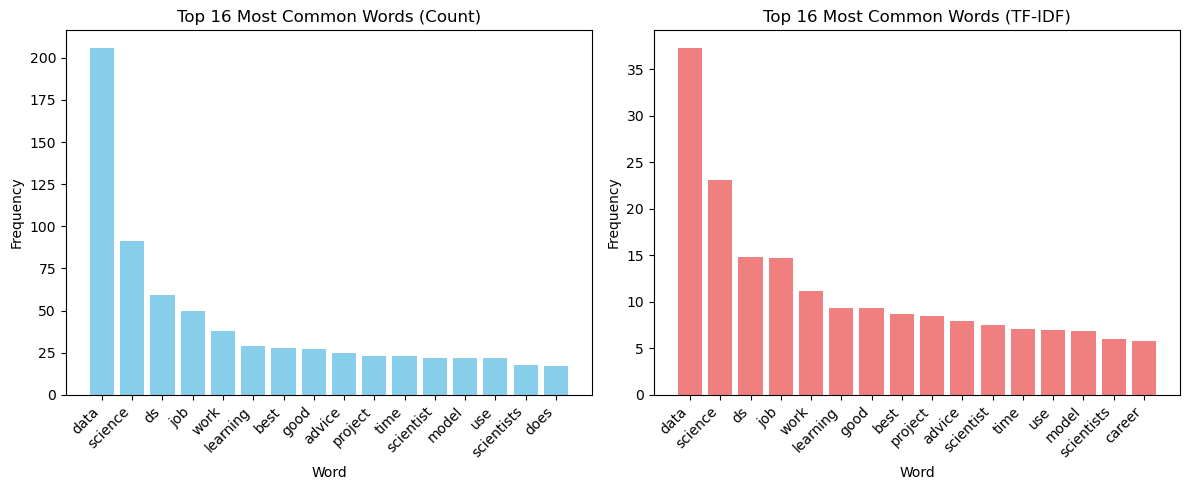

In [78]:
explore_text_preprocessing(df_datascience, column_name='title')

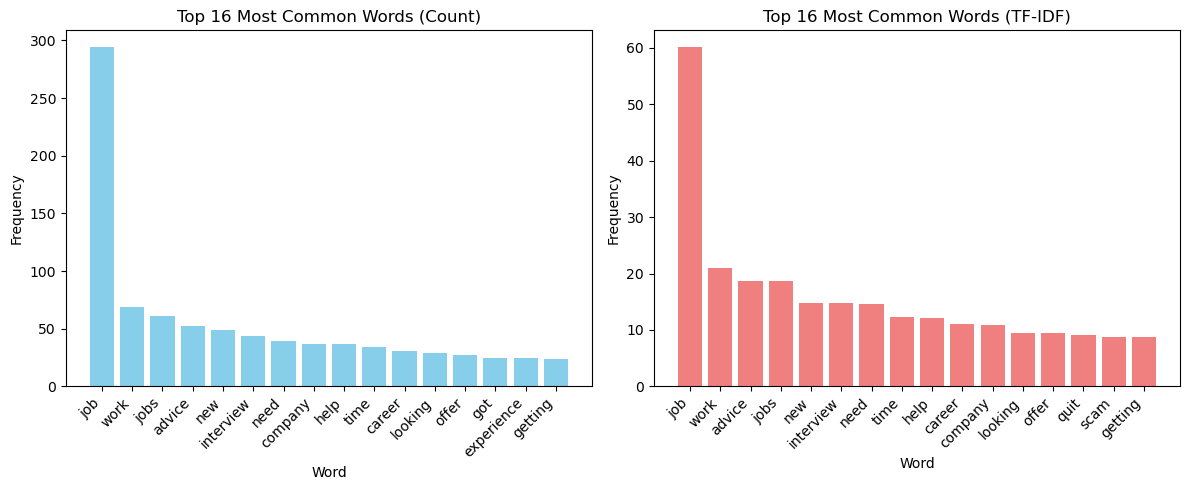

In [79]:
explore_text_preprocessing(df_jobs, column_name='title')

In [80]:
# Set the maximum display width for columns
pd.options.display.max_colwidth = 400

ve_posts = df_jobs[df_jobs['selftext'].str.contains('ve')].head() 
amp_post = df_jobs[df_jobs['selftext'].str.contains('amp')].head() 
don_post = df_jobs[df_jobs['selftext'].str.contains('don')].head()

In [81]:
print(don_post[['selftext']])

                                                                                                                                                                                                                                                                                                                                                                                                           selftext
4   Interviewed with a company and was offered the job and am to be given a start date once the background check is completed.\n\nIn 2022 I had a full time job which moved to part time once I took another position, and I worked at that part time job probably less than 100 hours over all of 2023.\n\nOn my resume I just put the end date for that job as when I stopped being full time and don't bother...
6   Hey everybody, I’m a first gen college student living in a rual area, so I don’t have access to a lot of resources. Hopefully reaching out here will help! I pick my major in two weeks, and

These words needs to be removed from the preprocessed data
- "amp" represent an ampersand (&).
- "ve" is a contraction due to stemming, such as "I've" meaning "I have
- "don" is a contraction due to stemming, such as "dont" meaning "do not'

In [82]:
custom_stop_words = {'ve', 'don', 'amp'}

#Combine custom stop words with NLTK stop words
stop_words = set(stopwords.words('english')).union(custom_stop_words)

#example text
example_text = "I' ve seen these word before, I don't think he has. It's amp and don."

def remove_specific_text(text):
    """
    Remove specific words and handle contractions from the input text 
    using regualar expression tokenizer.
    
    Parameters:
    - text (str): The input text to be preprocessed.
    
    Returns:
    - str: The preprocessed text with specified words and contractions removed.
    
    Example:
    example_text = "I' ve seen these word before, I don't think he has. It's amp and don."
    preprocessed_example = remove_specific_text(example_text)
    print(preprocessed_example) 

    """
    #handle contractions
    tokenizer = RegexpTokenizer(r"\w+['’]?\w+|\w+")
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stop words
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    
    # Join the filtered tokens back into a sentence
    filtered_text = ' '.join(filtered_tokens)
    
    return filtered_text

In [83]:
preprocessed_example = remove_specific_text(example_text)
print(preprocessed_example)

' seen word , n't think . 's .


In [84]:
# Apply the remove_specific_text function to 'selftext' column in df_datascience
df_datascience['selftext'] = df_datascience['selftext'].apply(remove_specific_text)

In [85]:
# Apply the remove_specific_text function to 'selftext' column in df_jobs
df_jobs['selftext'] = df_jobs['selftext'].apply(remove_specific_text)

In [86]:
#Apply the remove_specific_text function to 'title' column in df_datascience
df_datascience['title'] = df_datascience['title'].apply(remove_specific_text)

In [87]:
# Apply the remove_specific_text function to title column in df_jobs
df_jobs['title'] = df_jobs['title'].apply(remove_specific_text)

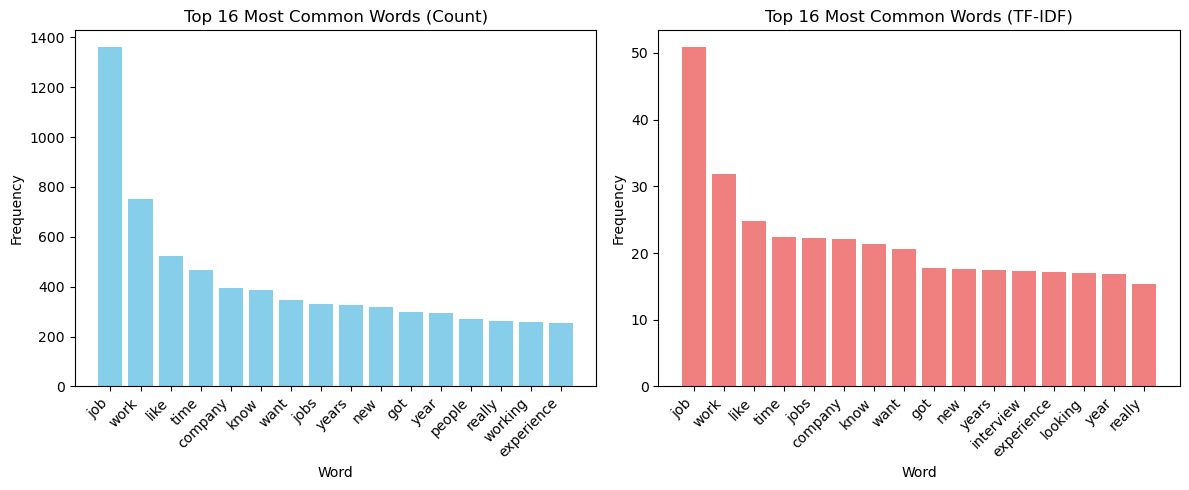

In [88]:
explore_text_preprocessing(df_jobs, column_name='selftext', save_path='../images/afterprocess_commonword_jobs.png')

**Topic Modeling**

This section will use Topic Modeling to identify prevalent topics in the text. Topic Modeling identifies and extracts abstract topics from large collections of text documents. It uses a black-box algorithms such as Latent Dirichlet Allocation (LDA) to identify latent topics in the text and represent documents as a mixture of these topics (Kibe, 2023) It is suitable for tasks where you want to uncover the underlying themes or topics in a collection of texts. 

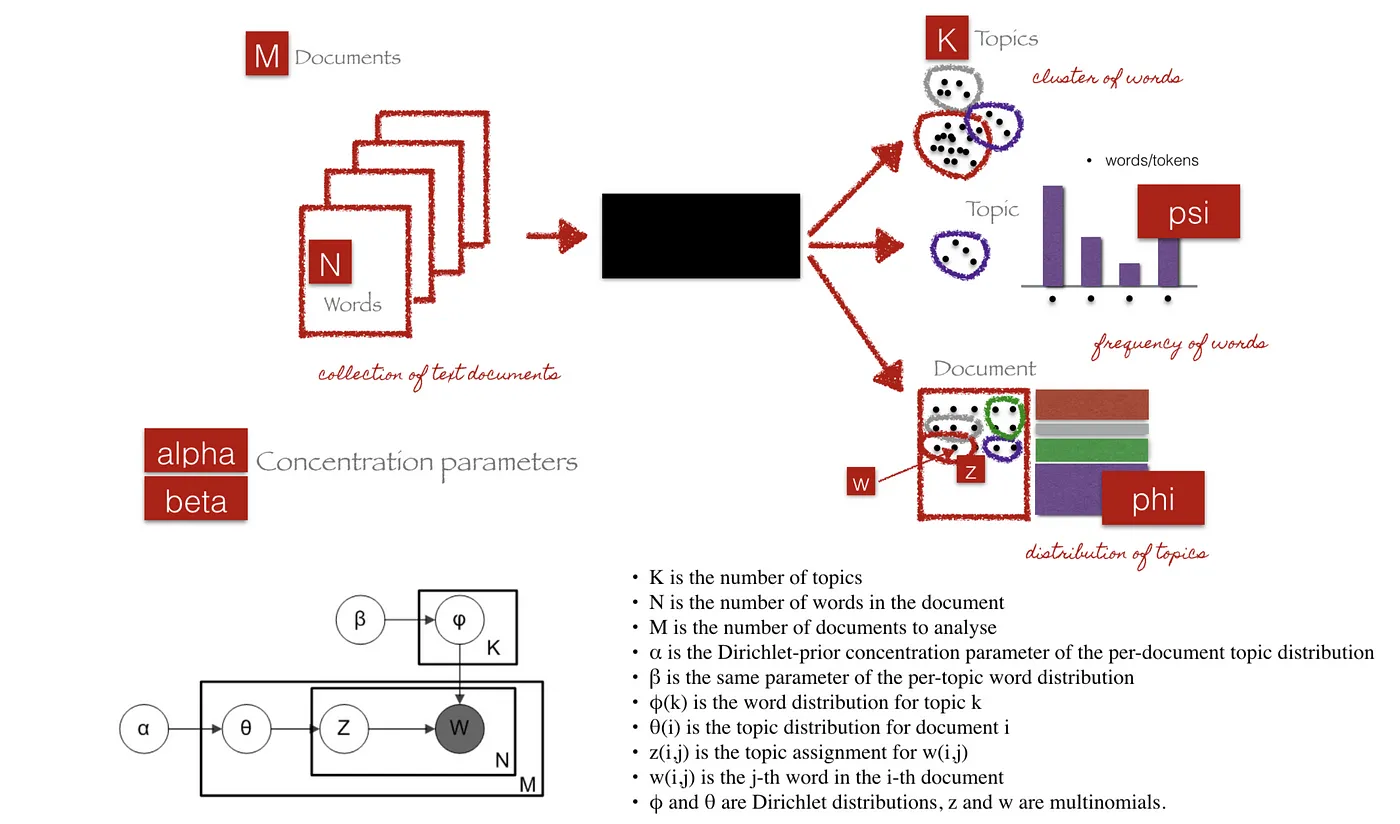
http://chdoig.github.io/pytexas2015-topic-modeling/#/3/4

Reference: 

Kapadia, S. (2022, December 23). Topic Modeling in Python: Latent Dirichlet Allocation (LDA). Medium. https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

Kibe, K. (2023, February 21). Topic modeling using Latent Dirichlet Allocation (LDA). Analytics Vidhya. https://www.analyticsvidhya.com/blog/2023/02/topic-modeling-using-latent-dirichlet-allocation-lda/

Sklearn.decomposition.latentdirichletallocation. scikit. (n.d.). https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html 

In [89]:
def perform_topic_modeling(data, column_name='selftext', num_topics=5):
    """
    Perform topic modeling using Latent Dirichlet Allocation (LDA) 
    on the data from the specified column.
    
    Parameters:
    - data (pd.DataFrame): The input dataframe containing 
    - column_name (str): The name of the column containing text data.
    Default is 'selftext'.
    - num_topics (int): The number of topics to identify. Default is 5.
    
    Returns:
     (prints the identified topics)
    
    Example:
    perform_topic_modeling(df_jobs, column_name='title', num_topics=10)
    
    """
    #extract text data
    text_data = data[column_name].astype(str)
    
    #vectorize the text data using CountVectorizer
    cvec = CountVectorizer(stop_words='english')
    X = cvec.fit_transform(text_data)
    
    #apply Latent Dirichlet Allocation(LDA)
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda.fit(X)
    
    #retrieves the word names from the vectorizer.
    feature_names = cvec.get_feature_names_out()
    # iterates over each topic index and 
    #the corresponding topic distribution in the LDA model.
    for topic_idex, topic in enumerate(lda.components_):
        #sorts the indices of words based of their probailities in asc order
        top_keywords_idex = topic.argsort()[:-6:-1]# take the top 5 words with highest prob
        top_keywords = [feature_names[i] for i in top_keywords_idex]#retrieves the actual words 
        #print(f"Topic #{topic_idex + 1}: {', '.join(top_keywords)}")#print top key words
        #print("=" * 50)
        
    return lda, feature_names
    
    

In [90]:
perform_topic_modeling(df_datascience, column_name='selftext', num_topics=10)

(LatentDirichletAllocation(random_state=42),
 array(['00', '000', '01', ..., 'zs2g', 'zs2g_u', 'zurich'], dtype=object))

In [91]:
perform_topic_modeling(df_jobs, column_name='selftext', num_topics=10)

(LatentDirichletAllocation(random_state=42),
 array(['00', '000', '025', ..., 'zoo', 'zoologist', 'zoom'], dtype=object))

In [92]:
perform_topic_modeling(df_datascience, column_name='title', num_topics=10)

(LatentDirichletAllocation(random_state=42),
 array(['000', '01', '10', ..., 'zero', 'zig', 'zones'], dtype=object))

In [93]:
perform_topic_modeling(df_jobs, column_name='title', num_topics=10)

(LatentDirichletAllocation(random_state=42),
 array(['000', '10', '100', ..., 'zones', 'zoo', 'zoologist'], dtype=object))

In [94]:
#logic attained from https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0
def generate_wordcloud(data, column_name='selftext', num_topics=5, save_path=None):
    #define lda and feature names from perform topic modeling function
    lda, feature_names = perform_topic_modeling(data, column_name, num_topics)
    
    # Get the top words for each topic
    top_words_per_topic = []
    for topic_index, topic in enumerate(lda.components_):
        top_keywords_index = topic.argsort()[:-6:-1]
        top_keywords = [feature_names[i] for i in top_keywords_index]
        top_words_per_topic.append(top_keywords)

    # Join the top words for all topics into a single string
    all_top_words = ' '.join([' '.join(words) for words in top_words_per_topic])

    # Create a WordCloud object
    wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

    # Generate a word cloud
    wordcloud.generate(all_top_words)

    # Visualize the word cloud
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    
    #save the image if save path provided
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
    plt.show()


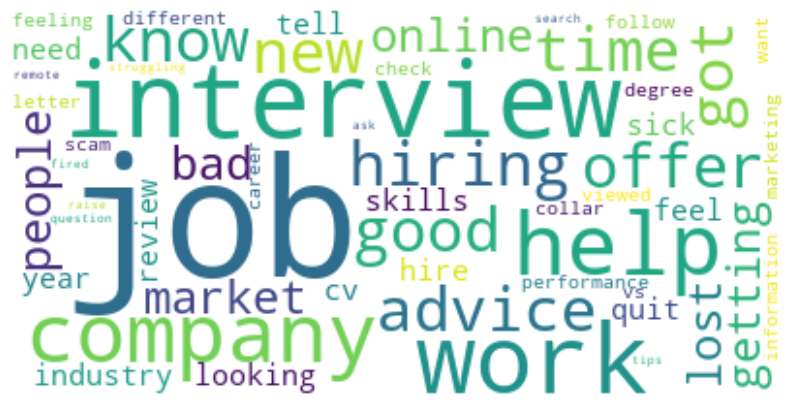

In [95]:
generate_wordcloud(df_jobs, column_name='title', num_topics=20, save_path='../images/wordcloud_job.png')

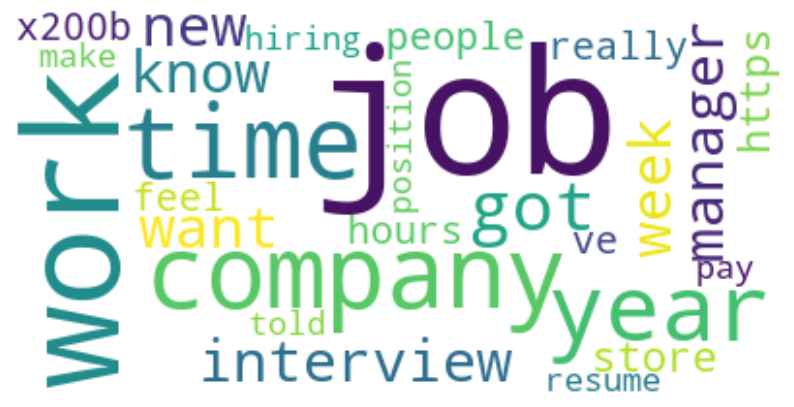

In [96]:
generate_wordcloud(df_jobs, column_name='selftext', num_topics=20)

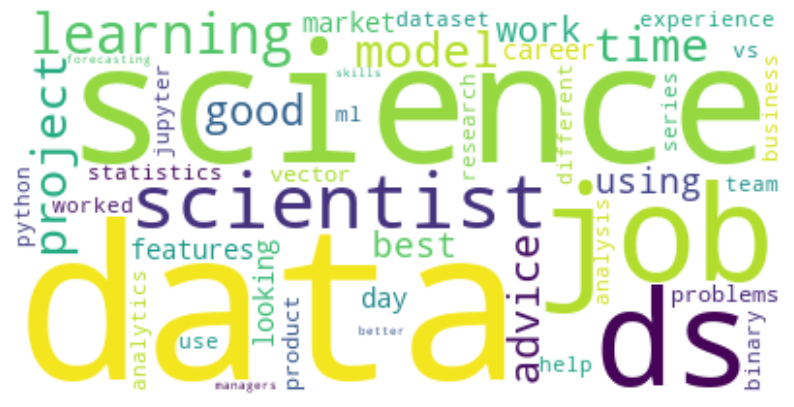

In [97]:
generate_wordcloud(df_datascience, column_name='title', num_topics=20, save_path='../images/worldcloud_datascience.png')

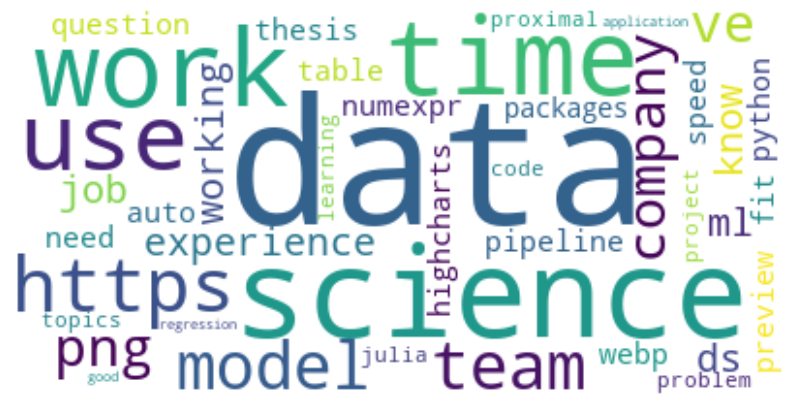

In [98]:
generate_wordcloud(df_datascience, column_name='selftext', num_topics=20)

**Interpretation**

I created a word cloud using the wordcloud package to get a visual representation of the most common words for each topic. This aspect was key to understanding the data and ensuring I am on the right track, and if any more preprocessing is necessary before training the model. Based of the world clouds, alot of the contractions and common stop words are not prescent, indicating the preprocessing of the data was successful.

- r/datascience: From the words clouds, some topics that were extracted were general NLP and data processing,  (pipeline, data, use, fit, need), Python and Web Technologies (Python, regression, ml, proximal, highcharts, numexpr, web-related), Image Processing (https, png, webp, preview, auto), Team/Collaboration (experience, time, https, team) and academic research/time managment (thesis, use question, time, speed) 

- r/jobs: from the words cloud, some topic that were extracted were Job Search and Interview (job, company, interview, week, resume, pay, hiring), Work Experience and Company Knowledge (job, work, years, know, degree), Retail and Management (store, job, com, https, manager, online, marketing), Job Preferences and Desire (Job, like, work, pay, jobs, time, want, quit, fired)